In [1]:
%load_ext autoreload
%autoreload 2
import HammingCode
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import erfc
import NeuralNetworkCorrection as network
import Autoencoder
import tensorflow as tf


2024-06-10 16:44:59.807197: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-10 16:44:59.807278: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-10 16:44:59.808806: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-10 16:44:59.819124: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-10 16:45:01.163540: W tensorflow/compiler/tf2

In [2]:
variancia = 1
code_rate = 4/7
# amostra
Eb_dB_values = np.arange(-5, 12, 1)

# Gerar dados de treinamento
training_sample_length = 10 ** 5
epoches = 15
batch_size = 64

In [3]:
# Criar e treinar a rede neural
#model = network.train_neural_network(training_data, epoches, batch_size)

In [4]:
#autoencoder, encoder, decoder = Autoencoder.create_and_train_auto_encoder(training_data)

In [5]:
#autoencoder = tf.keras.models.load_model('autoencoder')
#model = tf.keras.models.load_model('mlp')

In [6]:
# Gerar dados de teste
amostras_ruidosas = []
amostras_originais = []
ML_result = []
tradicional_result = []
autoencoder_result = []


In [7]:
#for eb_db in Eb_dB_values:
#    tradicional_result = (HammingCode.decode_sample())


In [8]:
test_data = {
    'original': [],
    'info': []
}
test_sample_length = 10 ** 5
test_information = network.get_training_data_set(test_sample_length)

BER_tradicional = []
BER_autoencoder = []
BER_ML = []

padded_array = []
for eb_db in Eb_dB_values:
    info = network.generate_data_for_training(test_information, eb_db, variancia)
    test_data['original'] = info['original_data']
    

    #autoencoder_result = (network.decode_and_correct(info['split_noisy_original_data_15_11'], autoencoder))
    ML_result = (network.decode_and_correct(info['split_noisy_original_data_15_11'], model))
    #print(info['split_encoded_data'][0])
    tradicional_result = (HammingCode.decode_sample(info['split_encoded_data']))
    
    padded_array = info['padded_array_original_data']
    
    #BER_ML.append(np.sum(np.array(ML_result).astype(int) != padded_array) / len(padded_array))
    BER_tradicional.append(np.sum(np.array(tradicional_result).astype(int) != test_data['original']) / len(test_data['original']))
    #BER_autoencoder.append(np.sum(np.array(autoencoder_result).astype(int) != padded_array) / len(padded_array))
    print(eb_db)

-5
-4
-3
-2
-1
0
1
2
3
4
5
6
7
8
9
10
11


In [9]:
# Calcular a BER teórica
Eb_coded = np.array([eb_db + 10*np.log10(code_rate) for eb_db in Eb_dB_values])
Eb_values = 10**(Eb_coded/10)
BER_teorica_codificado = 0.5 * erfc(np.sqrt(Eb_values))

Eb_values_BPSK = 10**(Eb_dB_values/10)
BPSK = 0.5 * erfc(np.sqrt(Eb_values_BPSK))

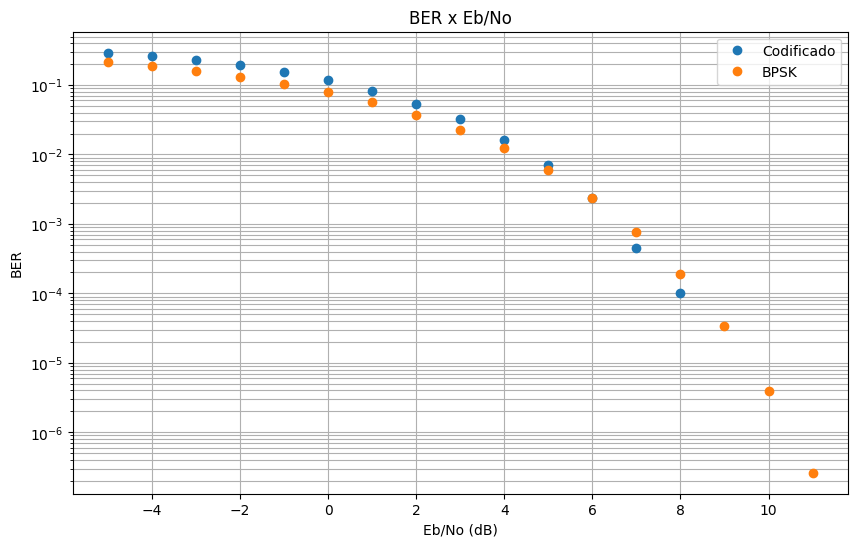

In [11]:
# Plotar as taxas de erro de bit simuladas e teóricas
plt.figure(figsize=(10, 6))
plt.semilogy(Eb_dB_values, BER_tradicional, marker='o', linestyle='', label='Codificado')
#plt.semilogy(Eb_dB_values, BER_autoencoder, marker='o',  linestyle='',label='Autoencoder')
#plt.semilogy(Eb_dB_values, BER_ML, marker='o', linestyle='', label='MLP')
plt.semilogy(Eb_dB_values, BPSK, marker='o', linestyle='', label='BPSK')
#plt.semilogy(Eb_dB_values, BER_teorica_codificado, marker='o', linestyle='', label='Teórico codificado')

plt.xlabel('Eb/No (dB)')
plt.ylabel('BER')
plt.grid(True, which='both')
plt.legend()
plt.title('BER x Eb/No')
plt.show()